In [59]:
import numpy as np                                                 
import pandas as pd                                                
import pandas_profiling 
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline
sns.set()
from datetime import datetime
import calendar
from scipy.stats import norm

In [86]:
def get_dataframe_from_csv(filename):
    dataset = pd.read_csv(filename)
    return dataset

def check_missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    
    return missing_data
    
def highest_occurance(data):
    h_o = data.value_counts()
    return h_o.head(15).plot(kind='pie', figsize = (20,12))

def lowest_occurance(data):
    l_o = data.value_counts(ascending=True)
    return l_o.plot(kind='bar', figsize=(20,12))

def lowest_occurance_pie(data):
    l_o = data.value_counts(ascending=True)
    return l_o.head(15).plot(kind='pie', figsize = (20,12))

def get_stats(data):
    mean = float("{:.2f}".format(data.mean()))
    median = float("{:.2f}".format(data.median()))
    std = float("{:.2f}".format(data.std()))
    cov = std / mean
    return mean, median, std, cov

def standard_dist(data):
    scaled = StandardScaler().fit_transform(data[:,np.newaxis])
    low_range = scaled[scaled[:,0].argsort()][:10]
    high_range= scaled[scaled[:,0].argsort()][-10:]
    print('outer range (low) of the distribution:')
    print(low_range)
    print('\nouter range (high) of the distribution:')
    print(high_range)
    



## Preprocessing:

In [3]:
dataset = get_dataframe_from_csv("/home/forhad/Study/Self_Work/XXX/dataset_trvg_case-2.csv")

In [4]:
dataset['date_ymd'] = dataset['date_ymd'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
dataset

,date_ymd,time_to_travel_grouping,length_of_stay_grouping,platform_country_code,adv_id,clicks,bookings,booking_rev_EURcent,cost_EURcent
0,2020-07-29,8,1,FI,345,22,0,0,51
1,2020-04-28,41,13,US,64,5,0,0,146
2,2020-08-10,2,1,IL,64,351,5,103666,3474
3,2020-08-24,8,15,TR,139,8,0,0,48
4,2020-09-10,2,13,HK,56,7,0,0,73
...,...,...,...,...,...,...,...,...,...
1008213,2020-04-15,41,8,HU,56,9,0,0,8
1008214,2020-10-22,29,2,TW,56,53,2,25779,666
1008215,2020-12-07,15,8,ZA,56,5,0,0,44
1008216,2020-06-16,301,4,CH,56,2,0,0,3


In [57]:
missing_data = check_missing_data(dataset)
missing_data

,Total,Percent
month,0,0.0
cost_EURcent,0,0.0
booking_rev_EURcent,0,0.0
bookings,0,0.0
clicks,0,0.0
adv_id,0,0.0
platform_country_code,0,0.0
length_of_stay_grouping,0,0.0
time_to_travel_grouping,0,0.0
date_ymd,0,0.0


In [5]:
dataset['month'] = dataset['date_ymd'].dt.month

In [6]:
dataset

,date_ymd,time_to_travel_grouping,length_of_stay_grouping,platform_country_code,adv_id,clicks,bookings,booking_rev_EURcent,cost_EURcent,month
0,2020-07-29,8,1,FI,345,22,0,0,51,7
1,2020-04-28,41,13,US,64,5,0,0,146,4
2,2020-08-10,2,1,IL,64,351,5,103666,3474,8
3,2020-08-24,8,15,TR,139,8,0,0,48,8
4,2020-09-10,2,13,HK,56,7,0,0,73,9
...,...,...,...,...,...,...,...,...,...,...
1008213,2020-04-15,41,8,HU,56,9,0,0,8,4
1008214,2020-10-22,29,2,TW,56,53,2,25779,666,10
1008215,2020-12-07,15,8,ZA,56,5,0,0,44,12
1008216,2020-06-16,301,4,CH,56,2,0,0,3,6


## Univariate Analysis For each columns

To understand the dataset more accurately, every possible distribution should be analyzed.

### TTT - Time To Travel Grouping

<AxesSubplot:>

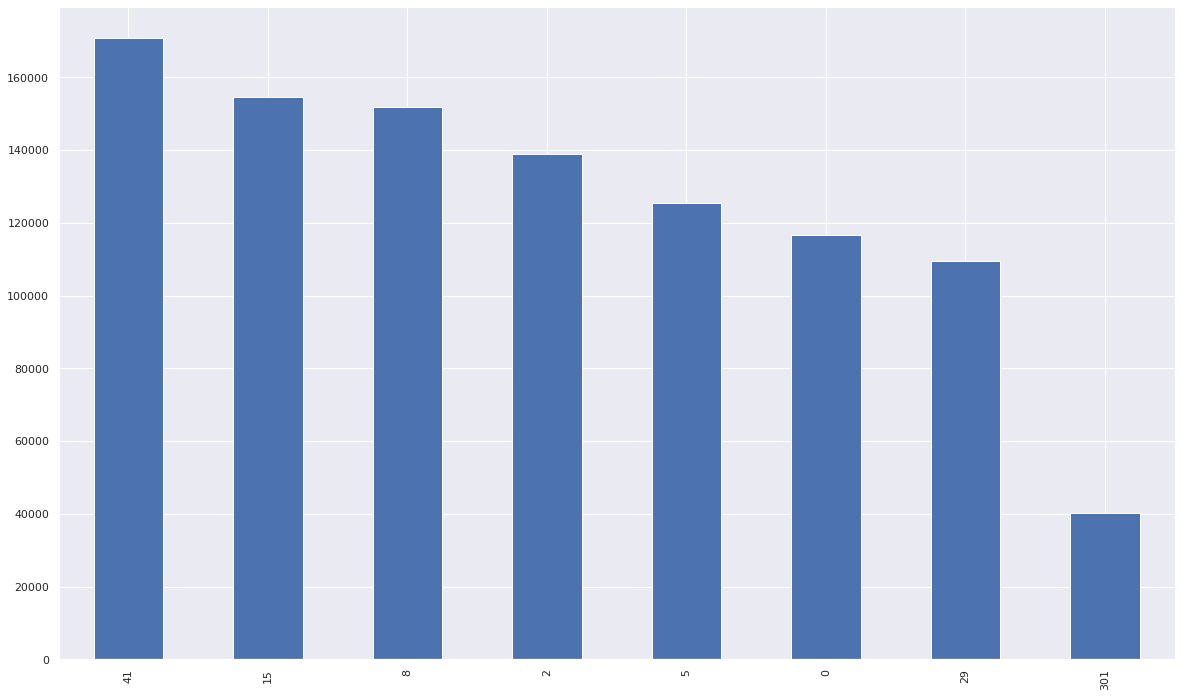

In [7]:
dataset['time_to_travel_grouping'].value_counts().head(10).plot.bar(figsize = (20,12))

It says Time to travel grouping(TTT) 41, which is the number of days between the date a reservation is made and the corresponding check-in date is more pupolar catagory than any other catagory! The above bar chart tells us absolute numbers, but it's also more useful to know relative proportions.

#### Percentage Wise Plot

The following graphs shows the percentage of the travel goups and plotted the results accordingly.

<AxesSubplot:>

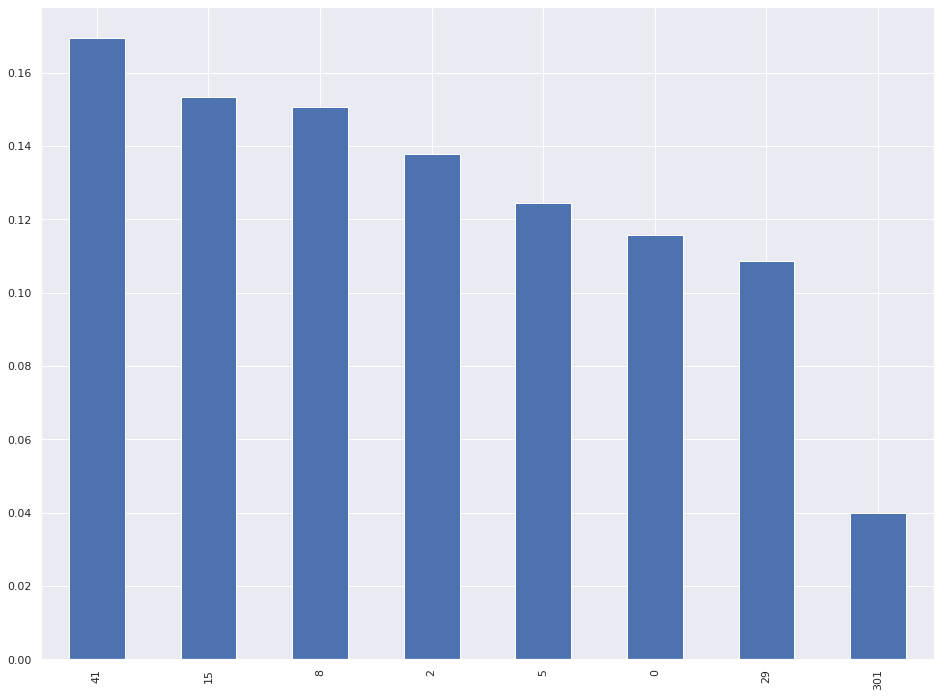

In [8]:
(dataset['time_to_travel_grouping'].value_counts().head(10) / len(dataset)).plot.bar(figsize = (16,12))

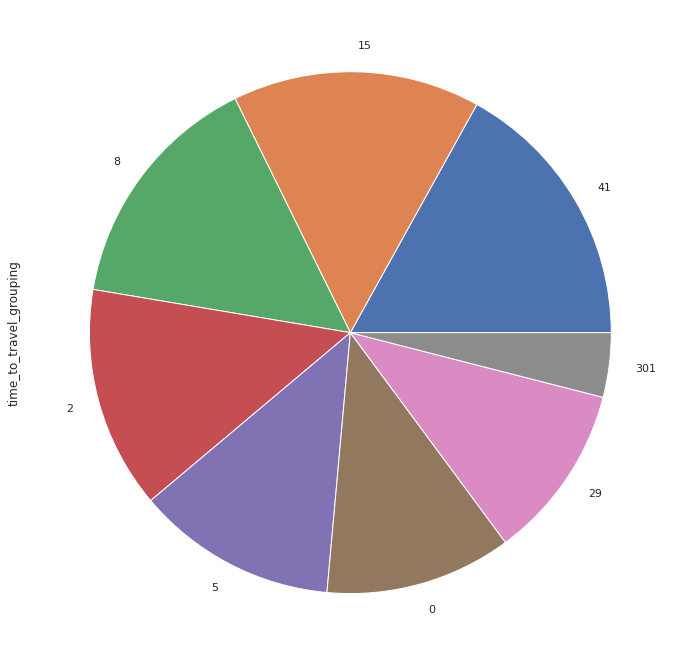

In [10]:
TTT = highest_occurance(dataset['time_to_travel_grouping'])

The above graph shows us that among the TTT, most prefers to place a booking 41-300 days in advance. From 2020, the number is 170K+, the closest TTT group is 15 and 8. Both has over 150K+ bookings in advance prior to their arrival. Among the groups, TTT group 31 prefers to book 301+ days in advance. 

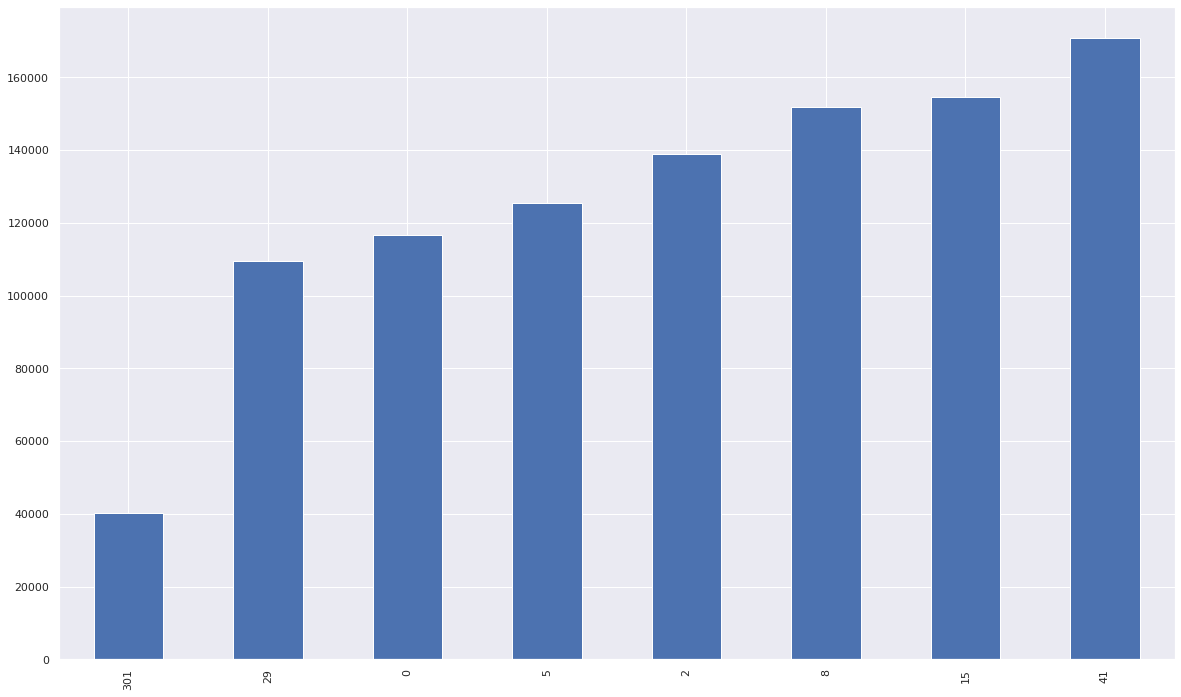

In [59]:
TTT = lowest_occurance(dataset['time_to_travel_grouping'])

Lowest to highest occurance of travel group.

In [7]:
dataset['time_to_travel_grouping'].value_counts()

41     170838
15     154668
8      151887
2      138924
5      125421
0      116599
29     109649
301     40232
Name: time_to_travel_grouping, dtype: int64

<AxesSubplot:>

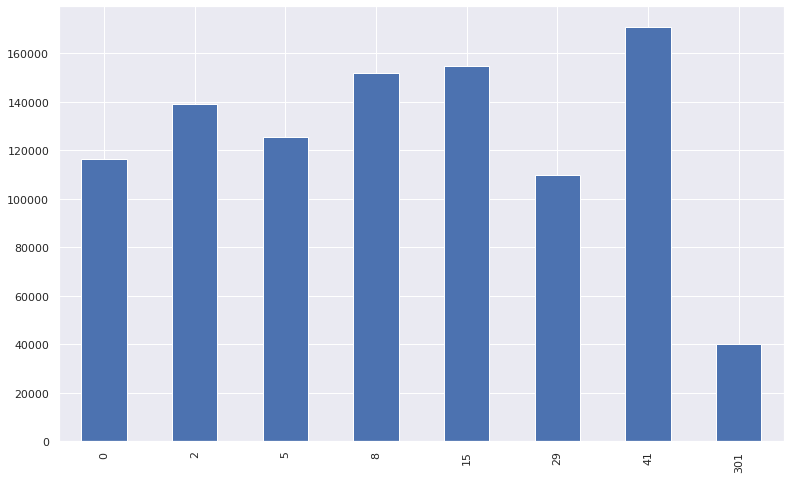

In [11]:
dataset['time_to_travel_grouping'].value_counts().sort_index().plot.bar(figsize=(13,8))


In [33]:
mean, median, std, _ = get_stats(dataset['time_to_travel_grouping'])
mean, median, std

(26.52, 8.0, 57.76)

<AxesSubplot:>

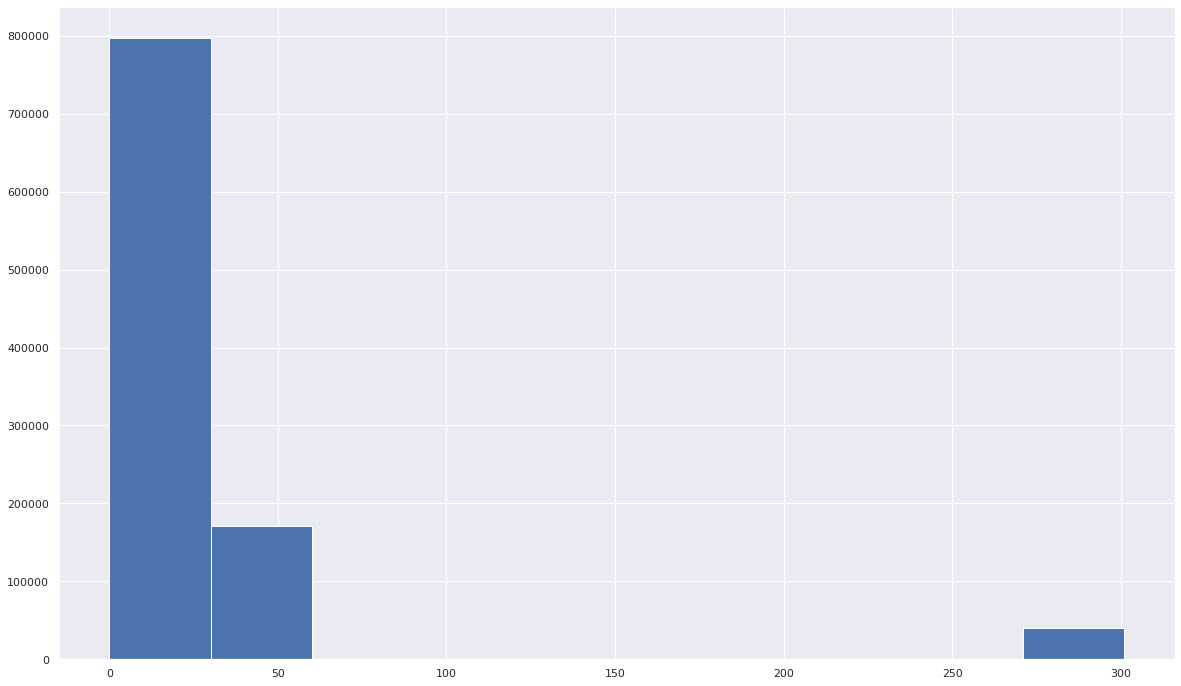

In [55]:
dataset['time_to_travel_grouping'].hist(figsize=(20,12))

This is a graphical representation that shows the organized group of data points in specific ranges. Like a bar chart, histogram interpret many data point by visually and by grouping them together.

### LOS - Length Of Stay

<AxesSubplot:>

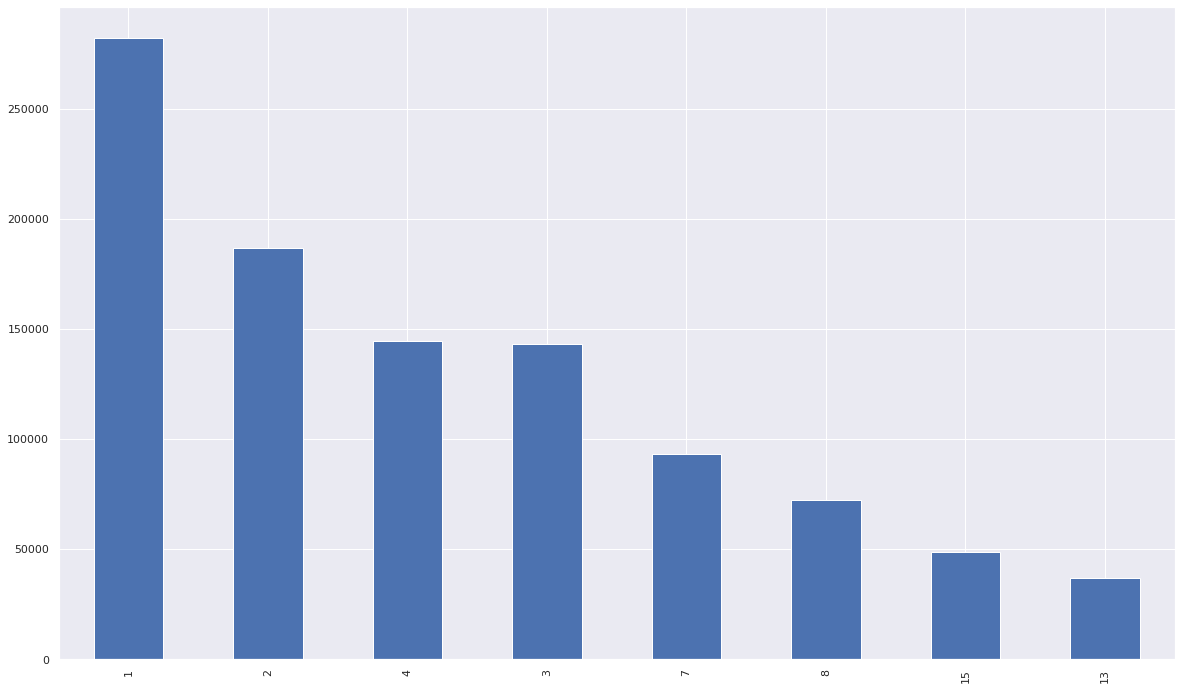

In [56]:
dataset['length_of_stay_grouping'].value_counts().head(10).plot.bar(figsize = (20,12))

The graph shows that, the total length of stay remains highest for the 1 night stay. No matter how bigger the travel group is, they prefer to stay one night at a time. The 2nd highest staying overnight is for 2 night stay. Keeping 4-6nights stay and 3 nights stay in the 3rd and fourth position. 13-14 and 15+ nights stay is in the lowest catagory and lowest preferred over night stay

#### Percentage wise LOS

<AxesSubplot:>

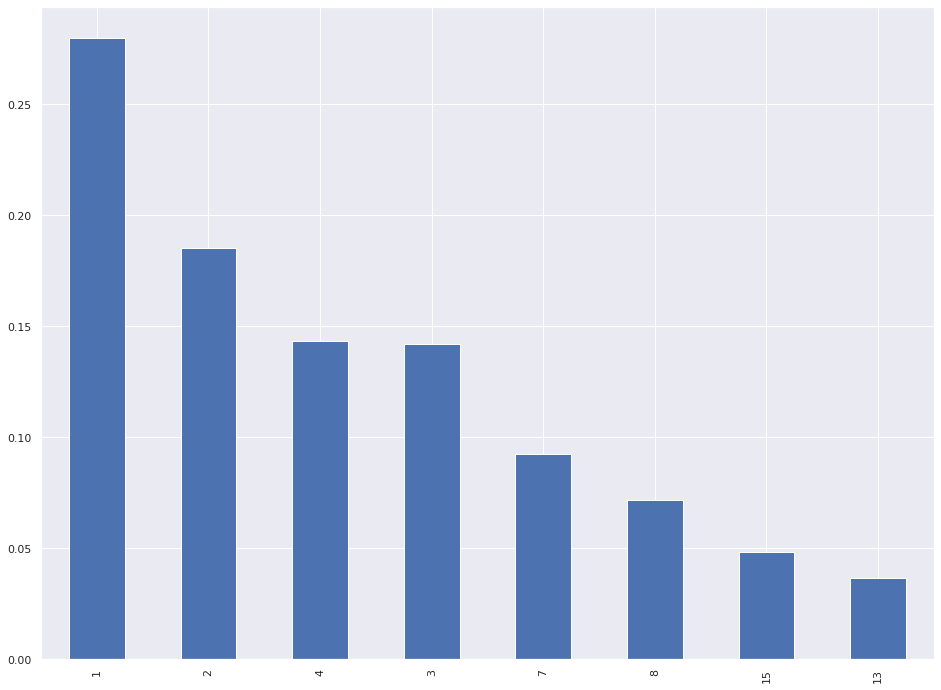

In [57]:
(dataset['length_of_stay_grouping'].value_counts().head(10) / len(dataset)).plot.bar(figsize = (16,12))

The following pie charts shows the highest and lowest occurances of the groups by taking length of stay into consideration:

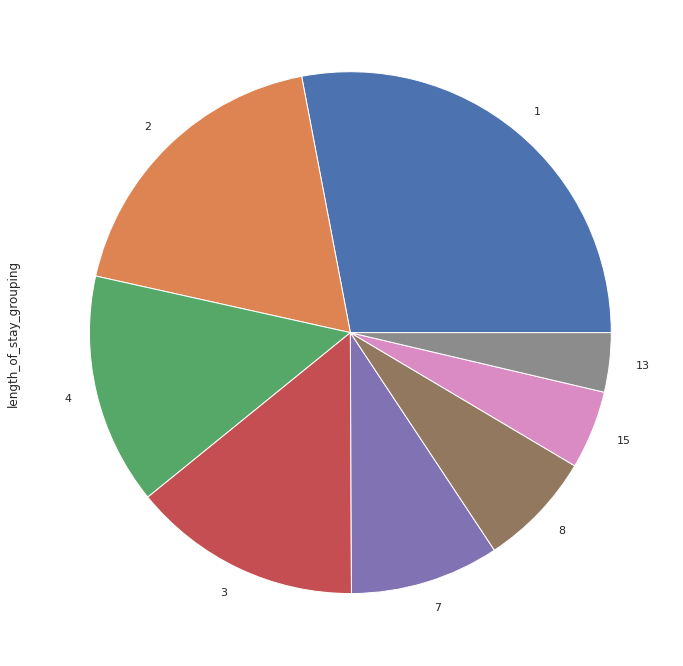

In [58]:
LOS = highest_occurance(dataset['length_of_stay_grouping'])

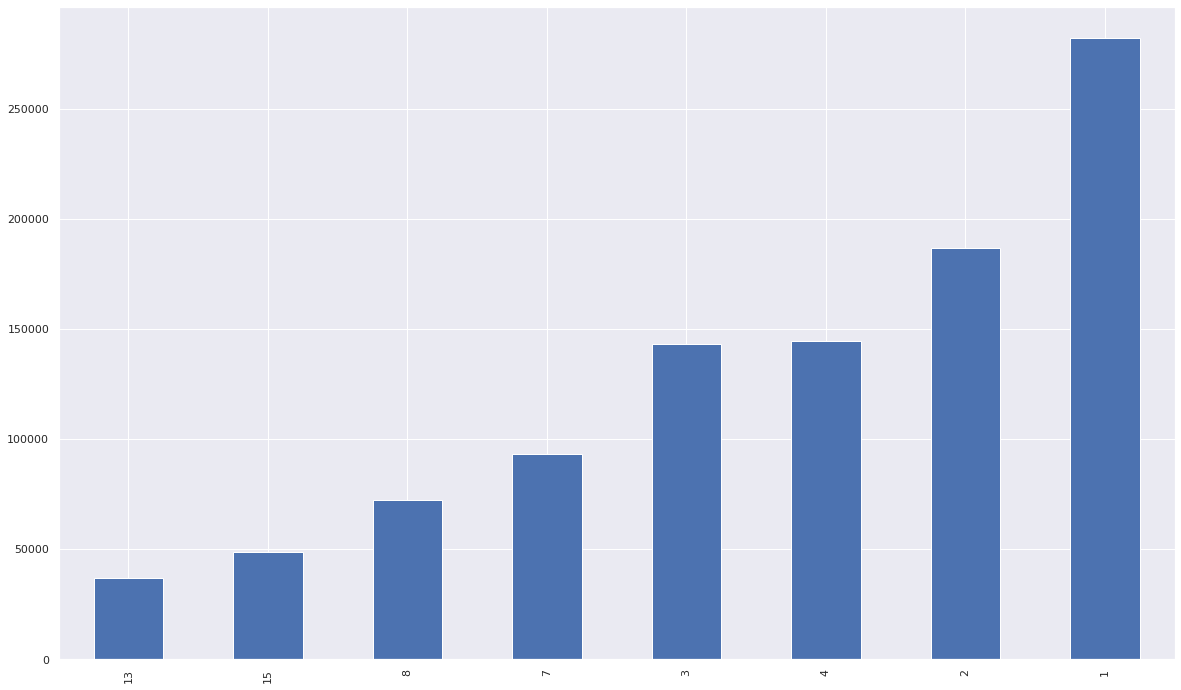

In [60]:
LOS = lowest_occurance(dataset['length_of_stay_grouping'])

#### Platform Country Code

<AxesSubplot:>

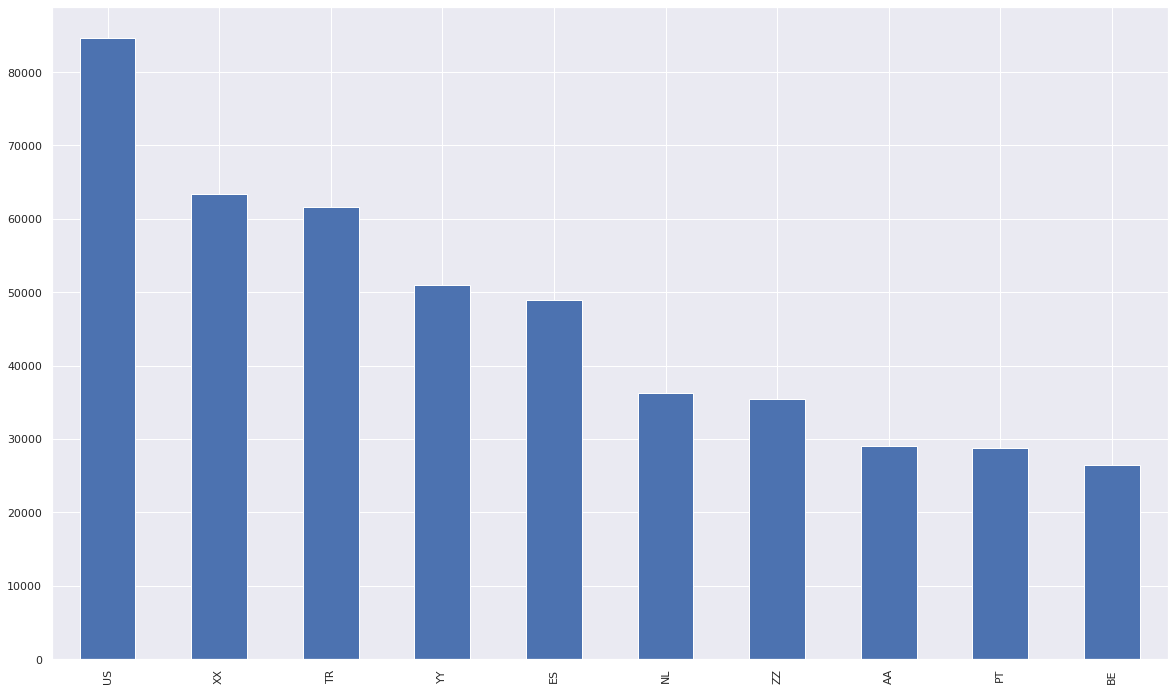

In [9]:
dataset['platform_country_code'].value_counts().head(10).plot.bar(figsize = (20,12))

Among the advertisers who gives revenue to XXX and also making profit of it, the top country which appear most in the US, followed by other countries.

##### Percentage wise appearence of country code

<AxesSubplot:>

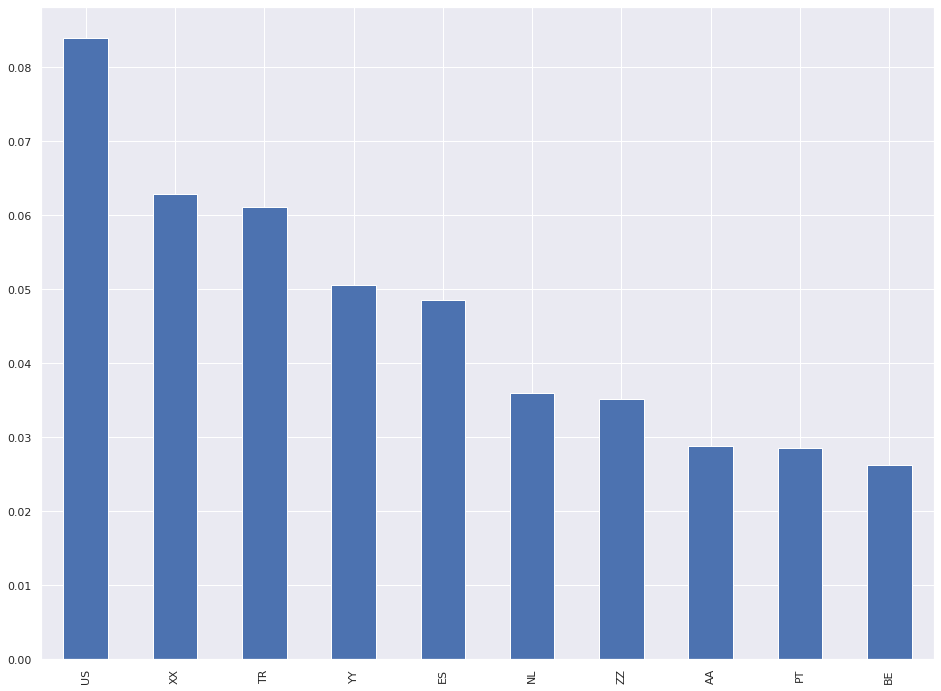

In [14]:
(dataset['platform_country_code'].value_counts().head(10) / len(dataset)).plot.bar(figsize = (16,12))

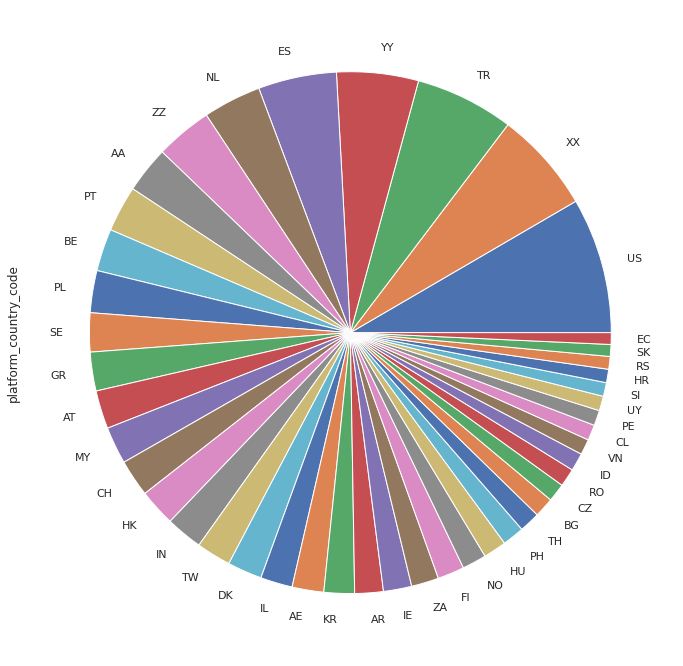

In [15]:
PCC = highest_occurance(dataset['platform_country_code'])


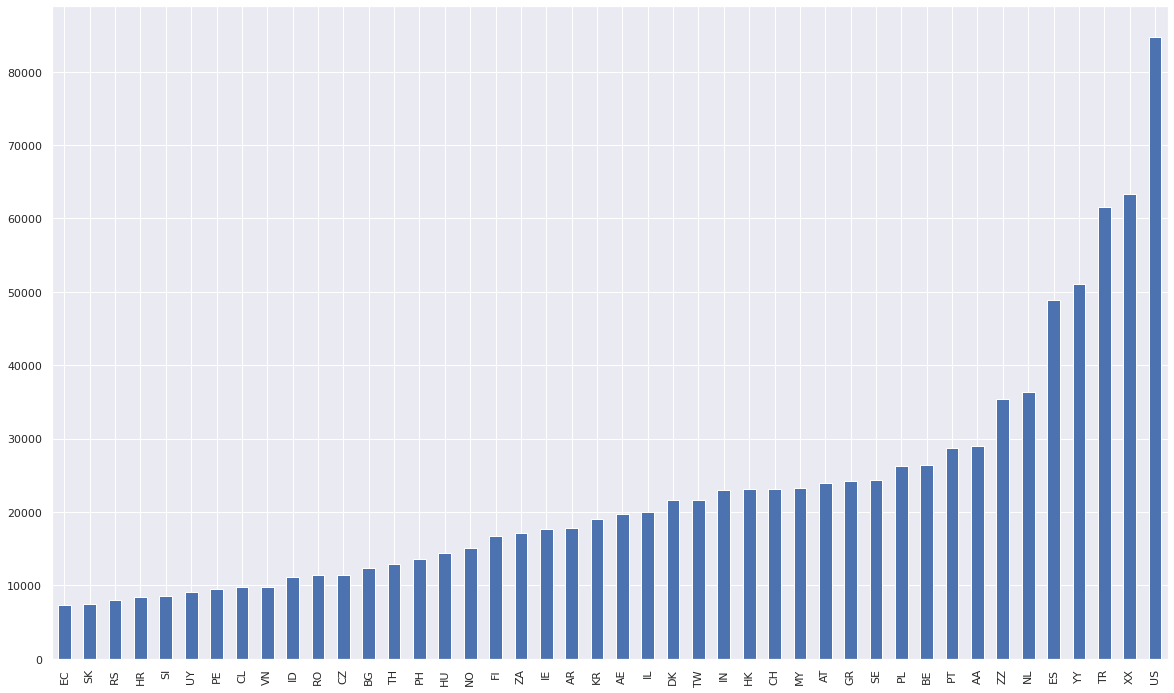

In [16]:
PCC = lowest_occurance(dataset['platform_country_code'])


Alphabatic wise sorting of the countries:

<AxesSubplot:>

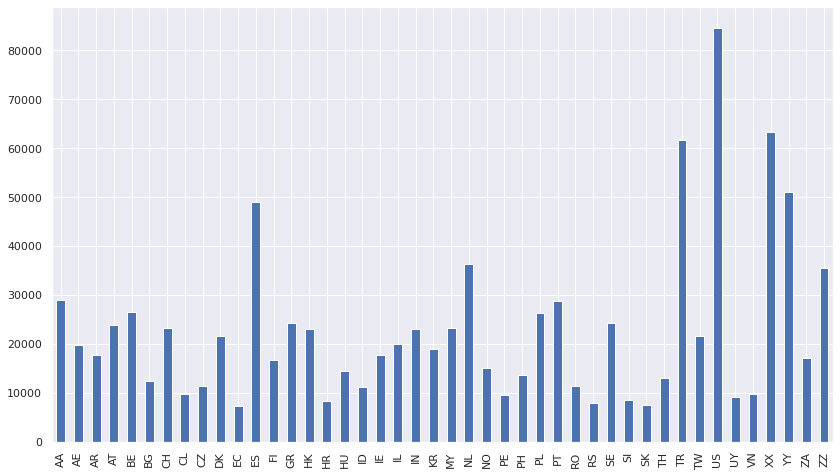

In [18]:
dataset['platform_country_code'].value_counts().sort_index().plot.bar(figsize=(14,8))


<AxesSubplot:>

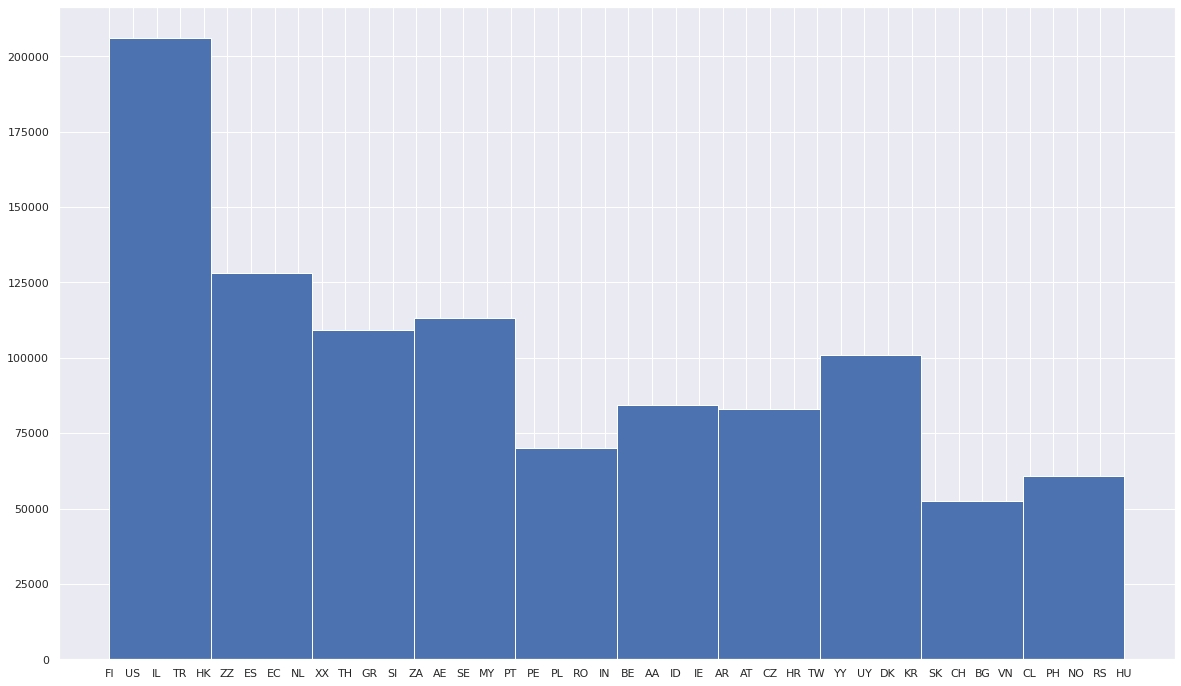

In [19]:
dataset['platform_country_code'].hist(figsize=(20,12))

### Advertisement ID or Advertiser

<AxesSubplot:>

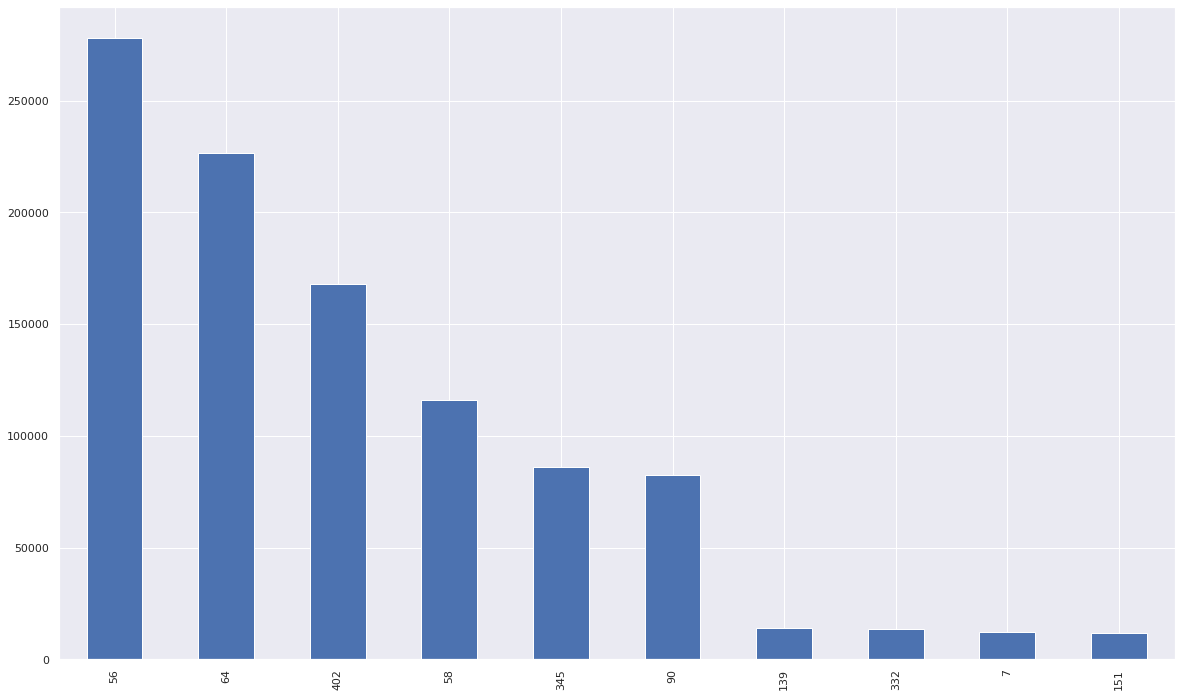

In [21]:
dataset['adv_id'].value_counts().head(10).plot.bar(figsize = (20,12))


All of the advertisers who spent most by doing advertisements, also travel groups prefers to stay is 56 number advertiser. The above charts also tells us the adv_id number 139, 332, 7 and 151 likely to advertise less, resulting the reduction of their booking/generating revenue. 

#### Percentage wise appearence of adv_id

<AxesSubplot:>

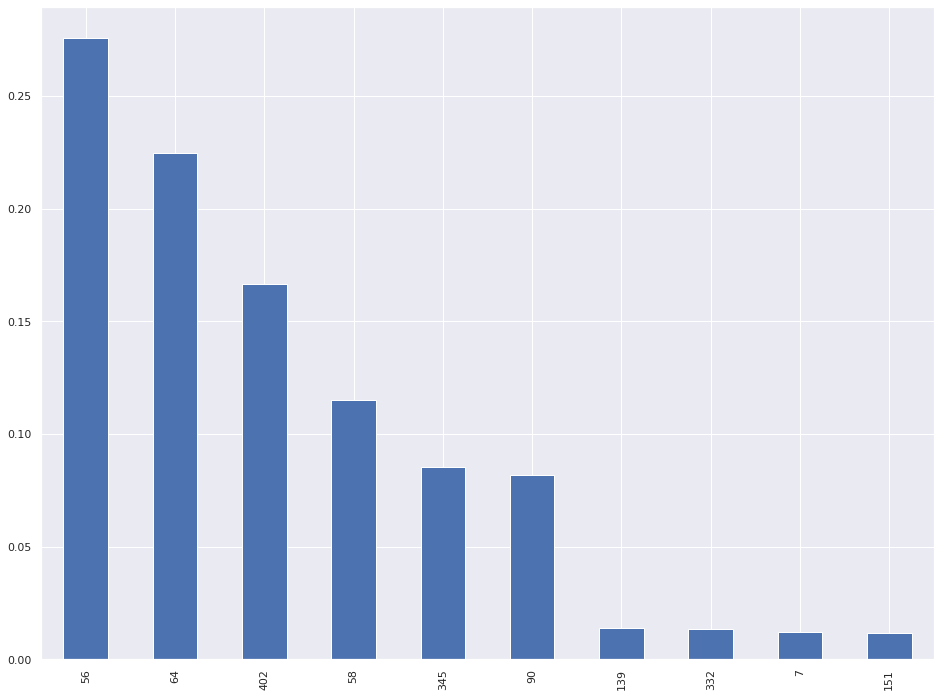

In [22]:
(dataset['adv_id'].value_counts().head(10) / len(dataset)).plot.bar(figsize = (16,12))


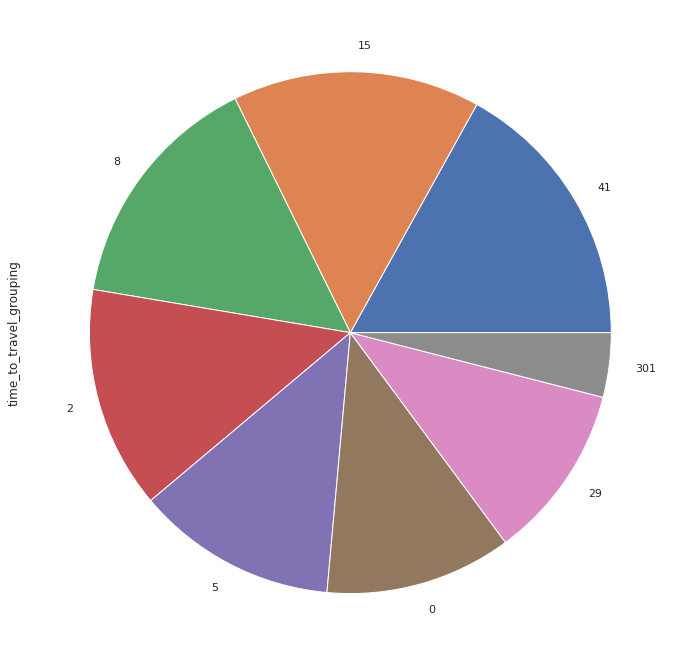

In [23]:
adv = highest_occurance(dataset['time_to_travel_grouping'])


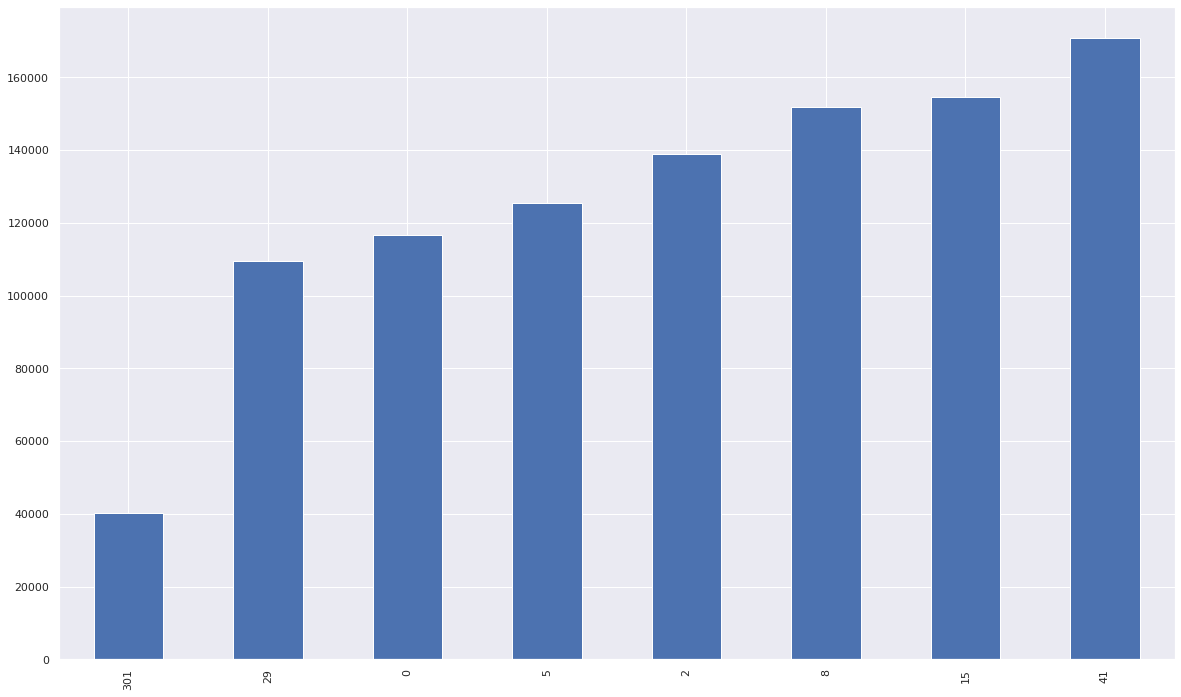

In [24]:
adv = lowest_occurance(dataset['time_to_travel_grouping'])


<AxesSubplot:>

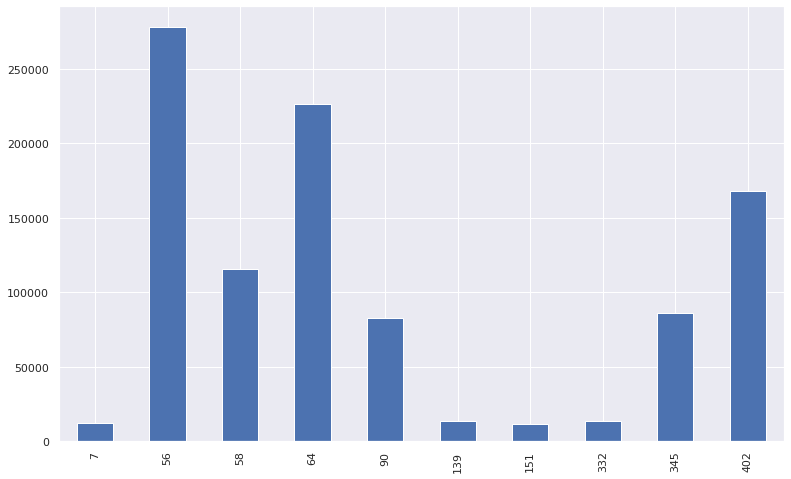

In [25]:
dataset['adv_id'].value_counts().sort_index().plot.bar(figsize=(13,8))

<AxesSubplot:>

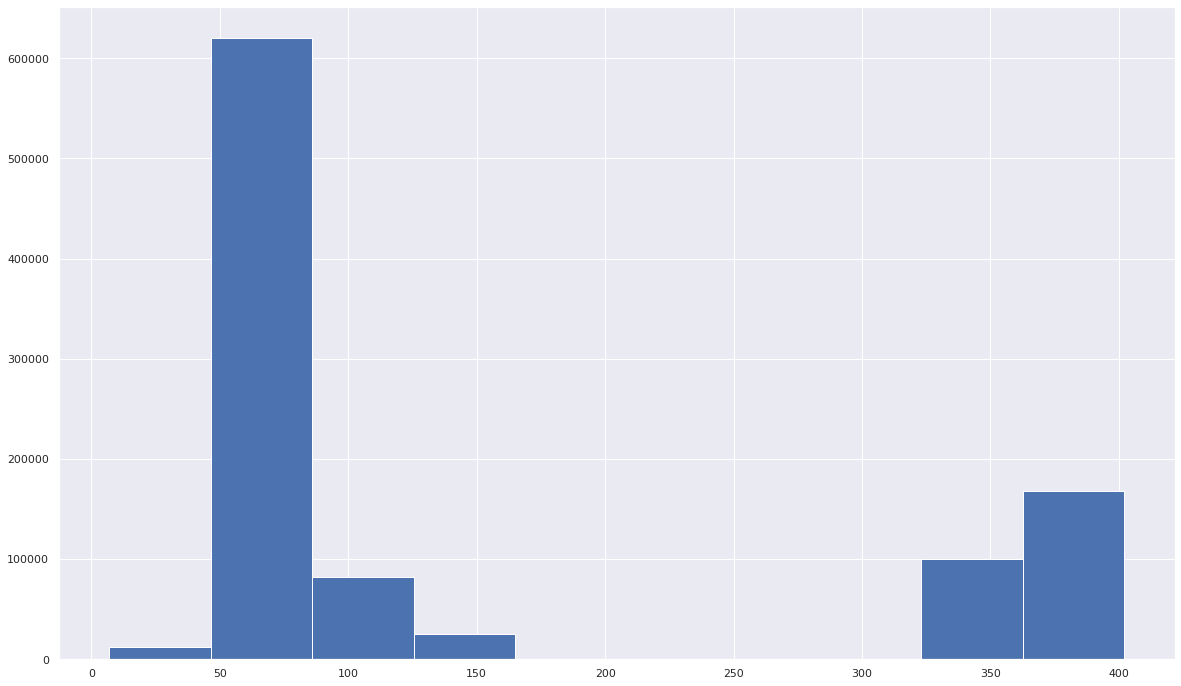

In [26]:
dataset['adv_id'].hist(figsize=(20,12))

### CLICKS

The following four charts represents the result of clicks. Advertisers who pays for the advertisements to run, likely getting less clicks. More than 200K+ advertisements gets only 2 clicks per visit. And the next number is 5 clicks. The fluctuation between clicks means that adversers some times advertise in the wrong sengments of time of the year with giving less attention in order to capture more tavel groups attention.

<AxesSubplot:>

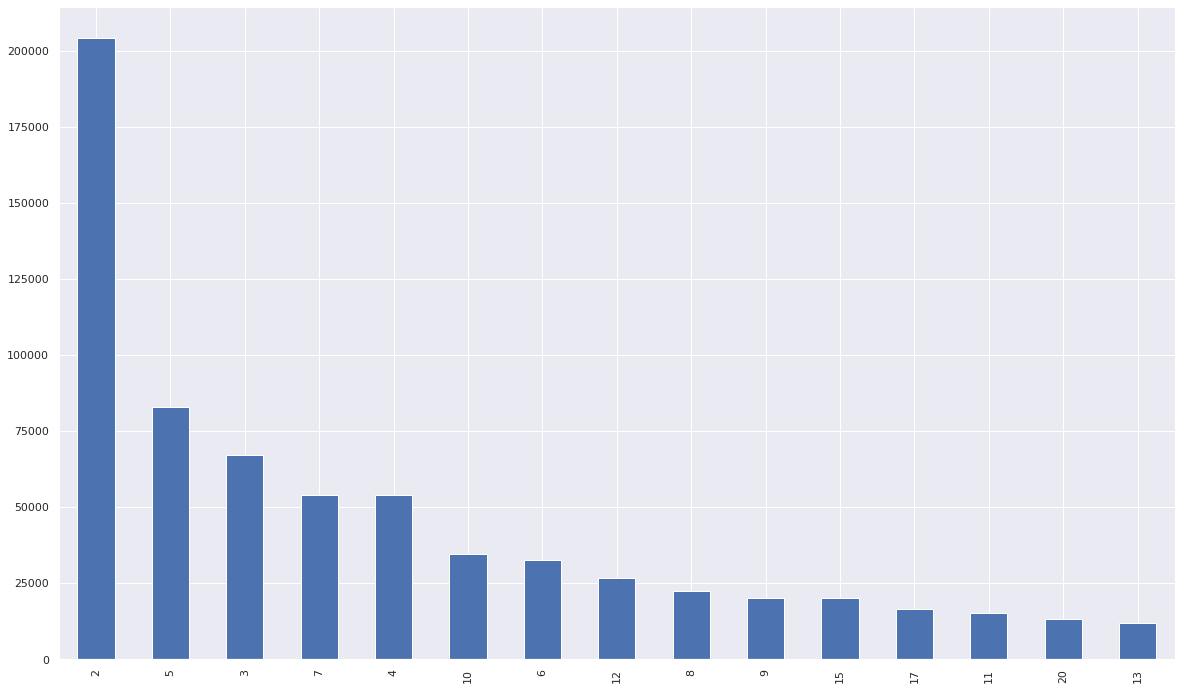

In [29]:
dataset['clicks'].value_counts().head(15).plot.bar(figsize = (20,12))


<AxesSubplot:>

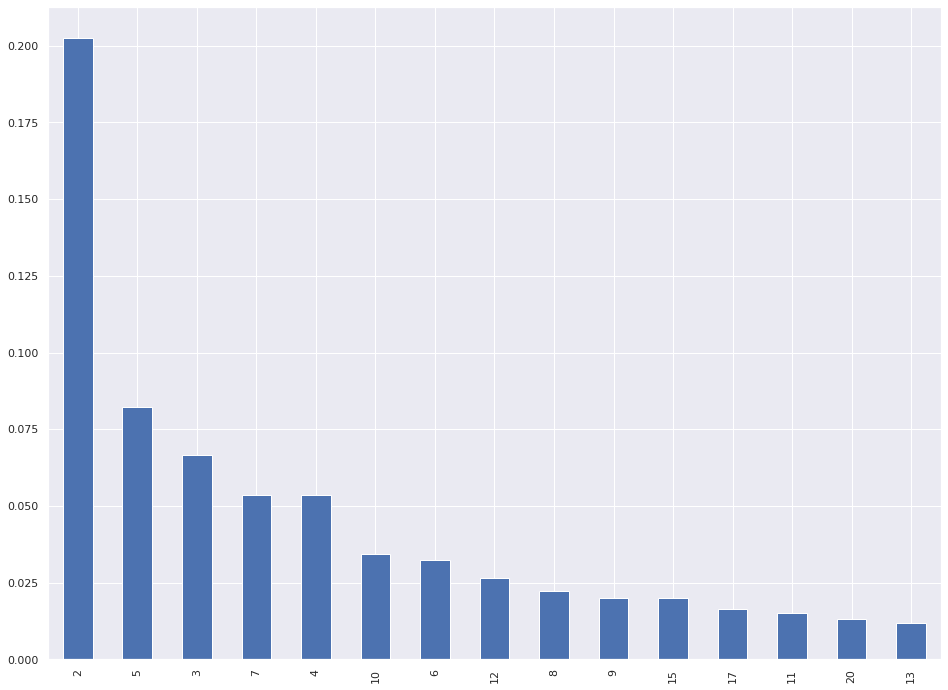

In [30]:
(dataset['clicks'].value_counts().head(15) / len(dataset)).plot.bar(figsize = (16,12))


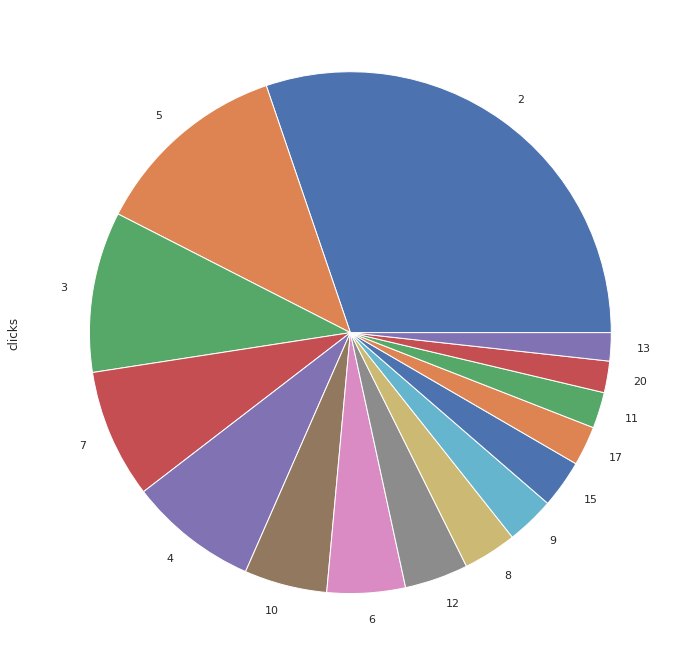

In [36]:
clicks = highest_occurance(dataset['clicks'])


<AxesSubplot:>

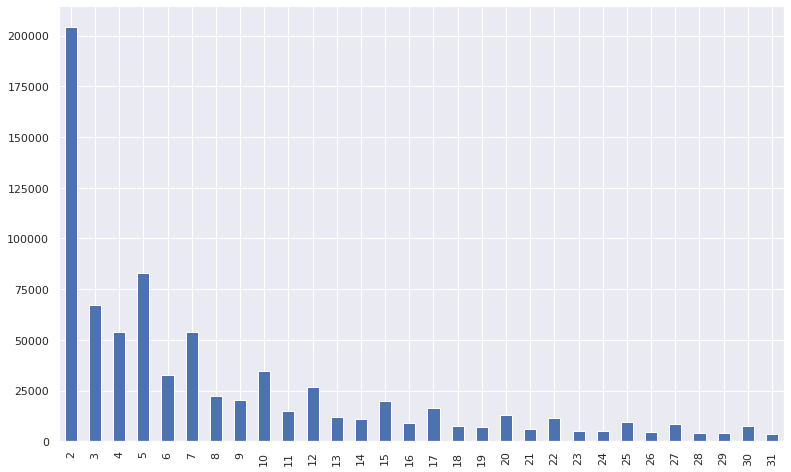

In [42]:
dataset['clicks'].value_counts().sort_index().head(30).plot.bar(figsize=(13,8))


<AxesSubplot:>

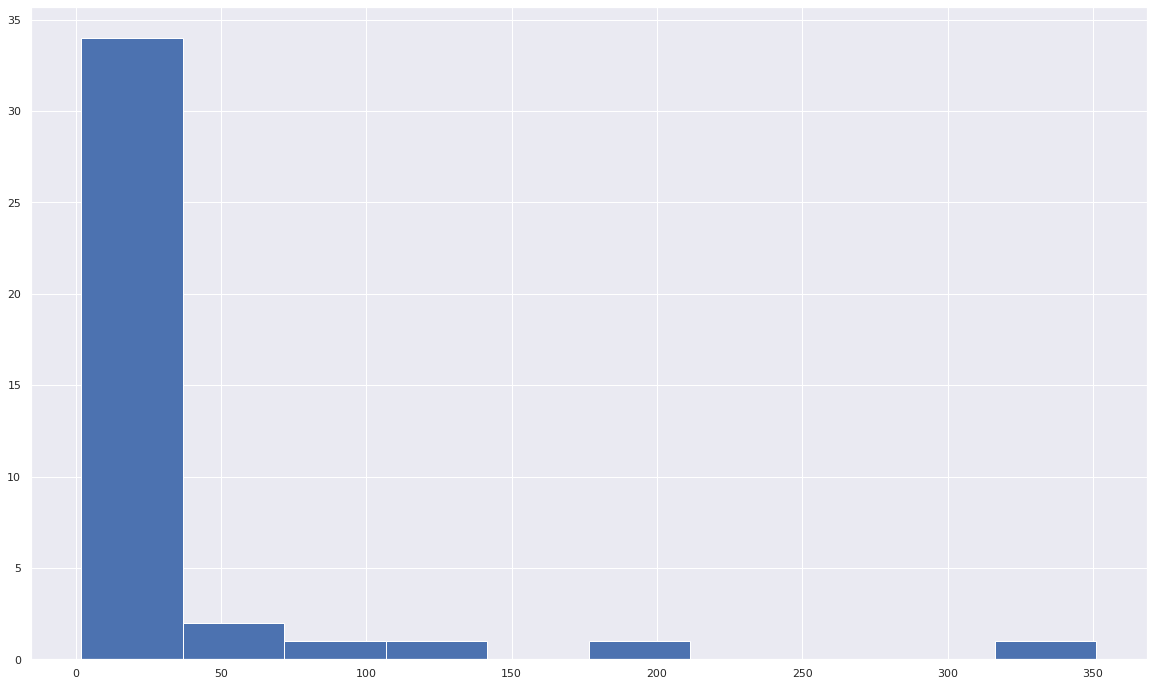

In [48]:
dataset['clicks'].head(40).hist(figsize=(20,12))

### BOOKING

<AxesSubplot:>

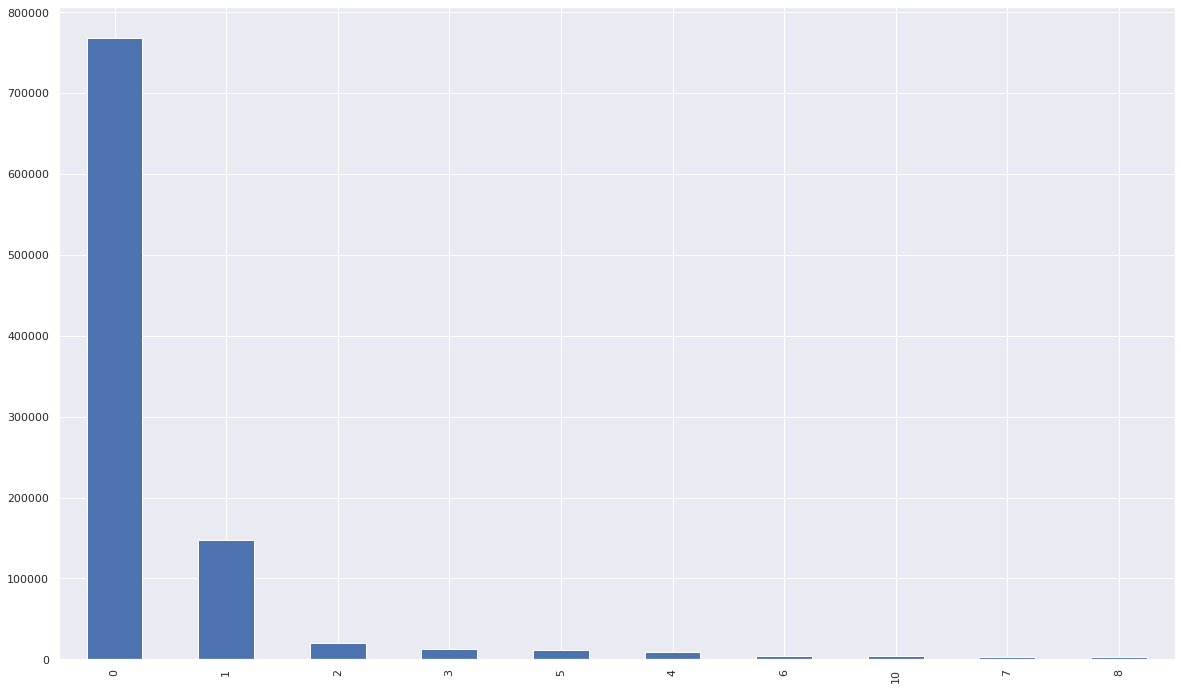

In [49]:
dataset['bookings'].value_counts().head(10).plot.bar(figsize = (20,12))

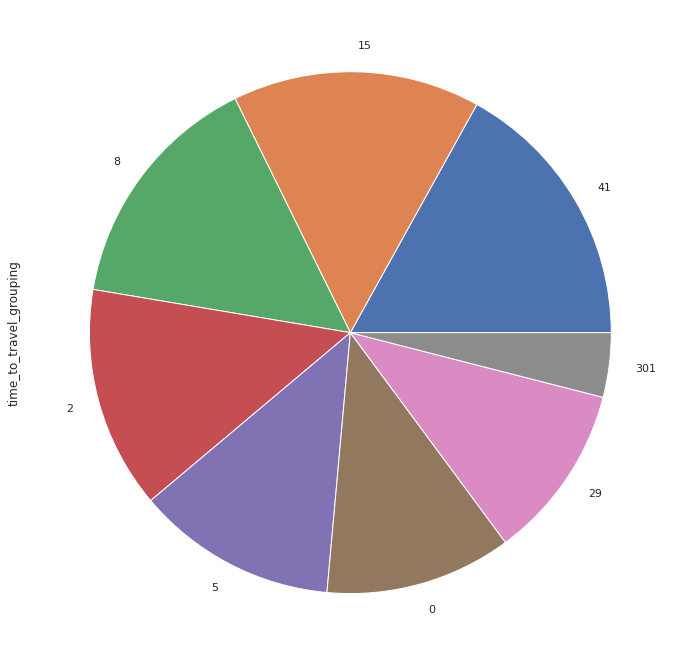

In [50]:
booking = highest_occurance(dataset['time_to_travel_grouping'])


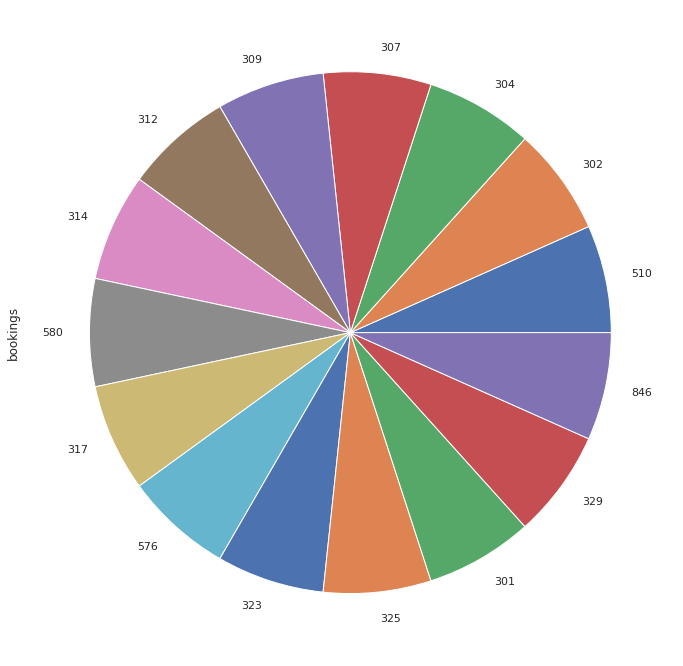

In [56]:
booking = lowest_occurance(dataset['bookings'])


<AxesSubplot:>

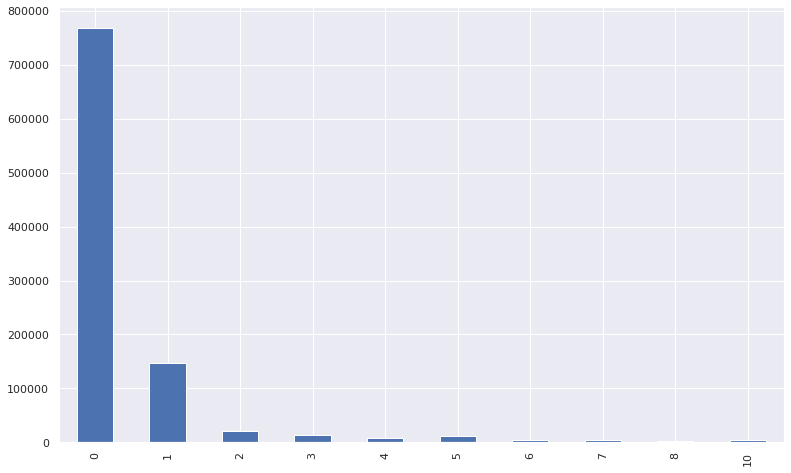

In [61]:
dataset['bookings'].value_counts().head(10).sort_index().plot.bar(figsize=(13,8))


<AxesSubplot:>

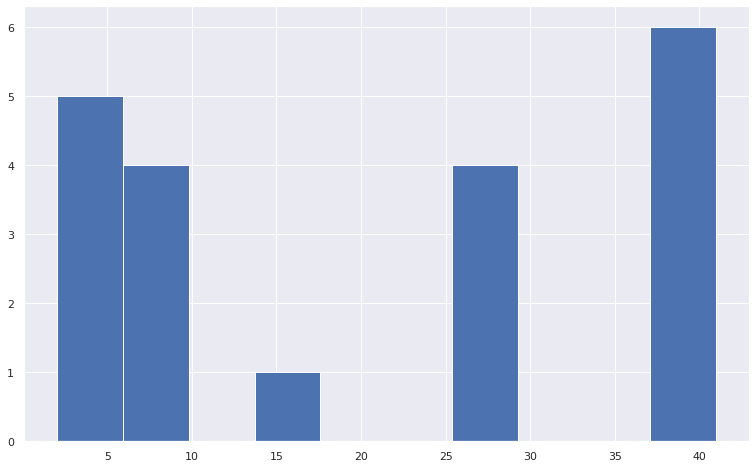

In [68]:
dataset['time_to_travel_grouping'].head(20).hist(figsize=(13,8))

### BOOKING Revenue

In [6]:
dataset['booking_rev_EURcent'].describe()

count    1.008218e+06
mean     2.566546e+04
std      1.355919e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.123092e+07
Name: booking_rev_EURcent, dtype: float64

In [37]:
dataset['booking_rev_EURcent'].sum()

25876378209

In [38]:
dataset['booking_rev_EURcent'].sum()/len(dataset)

25665.45946313198

<AxesSubplot:>

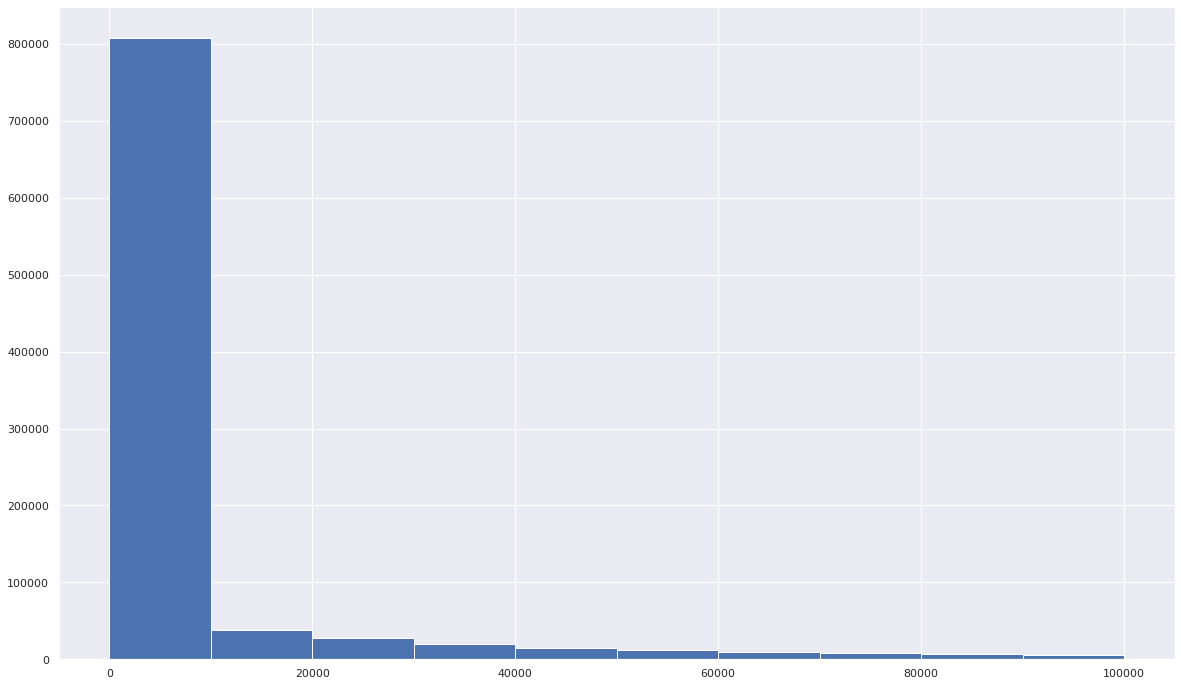

In [17]:
dataset["booking_rev_EURcent"][dataset["booking_rev_EURcent"]<100000].hist(figsize=(20,12))

#### The following graph is the gross revenue of the advertisers. How much revenue are they generating shows in the pie plot:

In [18]:
ng_price = dataset.groupby("platform_country_code")["booking_rev_EURcent"].mean()

<AxesSubplot:ylabel='booking_rev_EURcent'>

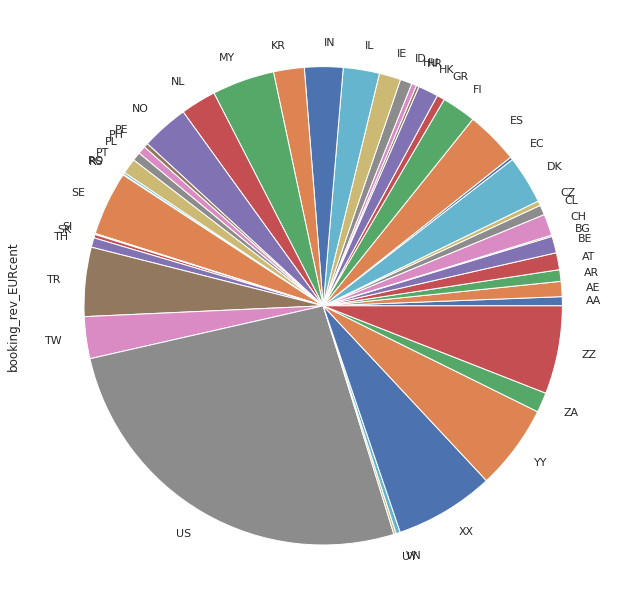

In [25]:
ng_price.plot(kind='pie', figsize = (20,11))

The standard distribution of the revenue from the bookings.


In [83]:
standard_dist(dataset['booking_rev_EURcent'])

outer range (low) of the distribution:
[[-0.1892847]
 [-0.1892847]
 [-0.1892847]
 [-0.1892847]
 [-0.1892847]
 [-0.1892847]
 [-0.1892847]
 [-0.1892847]
 [-0.1892847]
 [-0.1892847]]

outer range (high) of the distribution:
[[57.7936975 ]
 [58.58752848]
 [59.03861759]
 [61.31663823]
 [61.94874118]
 [61.96392646]
 [62.35855937]
 [67.83472241]
 [78.41127366]
 [82.63955921]]


### COST


In [39]:
dataset['cost_EURcent'].describe()

count    1.008218e+06
mean     1.251223e+03
std      7.834226e+03
min      0.000000e+00
25%      2.200000e+01
50%      8.300000e+01
75%      3.810000e+02
max      1.070120e+06
Name: cost_EURcent, dtype: float64

In [40]:
dataset['cost_EURcent'].sum()

1261505984

In [41]:
dataset['cost_EURcent'].sum()/len(dataset)

1251.2234298534643

<AxesSubplot:>

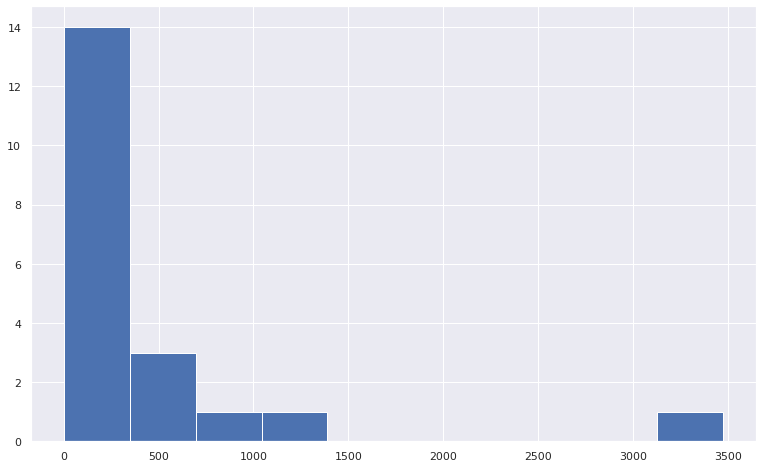

In [42]:
dataset['cost_EURcent'].head(20).hist(figsize=(13,8))

#### Ploting the distribution with a histogram and maximum likelihood gaussian distribution fit:

<AxesSubplot:xlabel='cost_EURcent'>

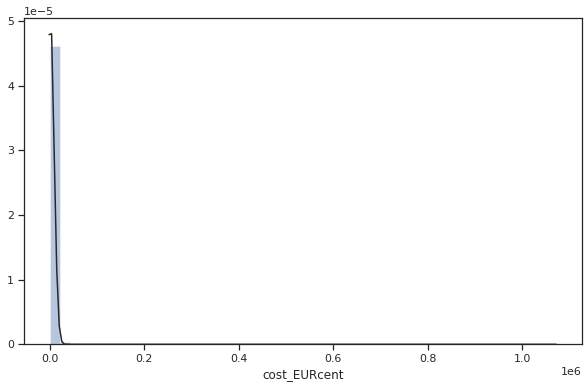

In [53]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.distplot(dataset['cost_EURcent'], fit=norm, kde=False)

In [85]:
standard_dist(dataset['cost_EURcent'])

outer range (low) of the distribution:
[[-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]
 [-0.15971253]]

outer range (high) of the distribution:
[[ 75.81873019]
 [ 78.76503418]
 [ 79.32756609]
 [ 83.76387122]
 [ 85.39785603]
 [ 88.02172852]
 [ 88.87401479]
 [ 95.49305098]
 [102.55884498]
 [136.43585209]]


How 'cost_EURcent' looks with her new clothes:

- Low range values are similar and not too far from 0 or in some cases less than 0.
- High range values are far from 0